In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
# Load data from a different source or modify the file path
data = pd.read_csv("advertising.csv")

# Display the first 15 rows of the data
data.head(15)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [3]:
# Display the shape of the data
data.shape


(200, 4)

In [4]:
# Display summary statistics of the data
data.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
# Check for missing values in the data
data.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

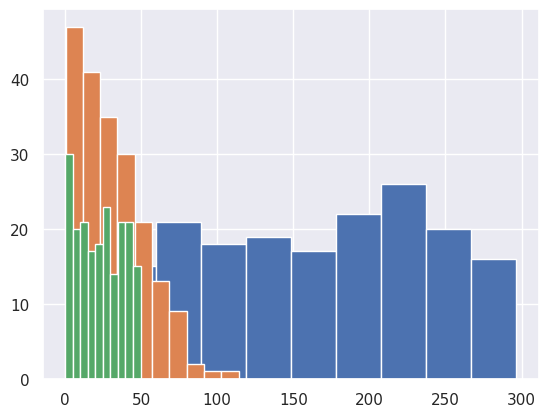

In [6]:
# Set seaborn style
sns.set()

# Plot histograms for each feature
data['TV'].hist()
data['Newspaper'].hist()
data['Radio'].hist()


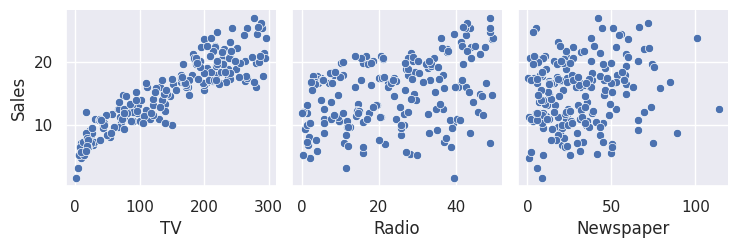

In [7]:
# Create a pairplot to visualize relationships between features and target variable
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')


<Axes: >

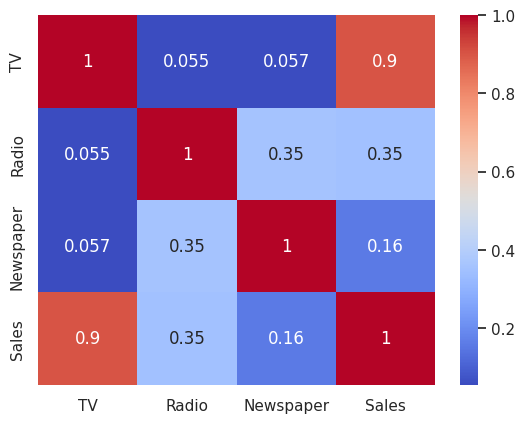

In [8]:
# Create a heatmap to visualize the correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


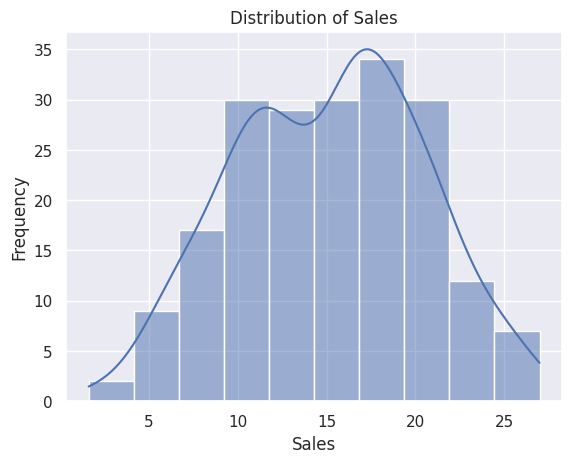

In [9]:
#  Distribution plot of the target variable (Sales)
sns.histplot(data['Sales'], kde=True)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Distribution of Sales")
plt.show()


In [10]:
# Prepare the features (X) and target variable (Y)
X_train, X_test, Y_train, Y_test = train_test_split(data.drop(columns='Sales'), data['Sales'], test_size=0.3, random_state=3)


In [11]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, Y_train)


LinearRegression()

In [12]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Display the predictions
print(predictions)


[17.94221632 11.28731032 19.36406753 15.25309499  8.85035488 11.08345095
 24.54827272 10.72184726 18.64190205 17.03877174 14.71887065 13.30204368
 19.10529921 11.4654086  13.82417942 14.56139355 16.86156735 17.27369971
 17.78634747 21.28201581 19.1397699  11.05346066  9.93276334 11.49854807
  8.5309559  13.26073545 21.75566382 16.96066432 24.25791572 11.92392893
 16.40376866 21.96064207  9.51770237 10.16209996 10.08141197 10.45644324
 15.54919097  9.92133897 13.83425453 12.54320065 14.5093965  12.61758414
  6.46804914 20.25656292 23.16303373 24.65508581 15.20817964  9.27513655
 18.72004324 18.16217728 12.73063894 16.65175796 15.79776032  8.36188762
 21.22771856  9.52094834 23.88078008 23.29062902 19.6930198  16.76467522]


In [13]:
# Display the intercept of the model
print(model.intercept_)


5.022730805826269


In [14]:
# Display the coefficients of the model
print(model.coef_)


[ 0.05223455  0.10672463 -0.00120158]


In [15]:
# Calculate and display the accuracy score
accuracy_score = model.score(X_test, Y_test) * 100
print(f"Accuracy of the model: {accuracy_score}%")


Accuracy of the model: 88.77675297095176%


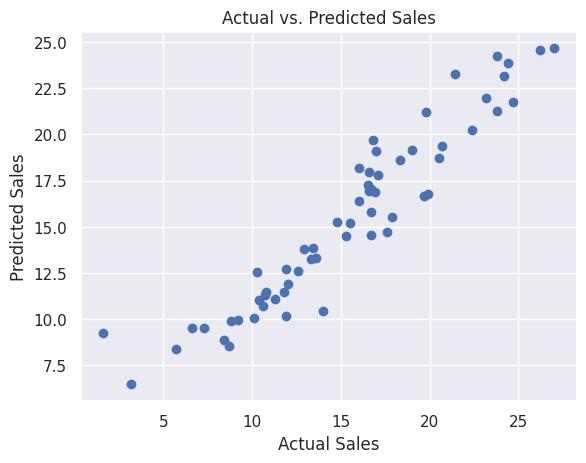

In [16]:
# Scatter plot of actual vs. predicted sales values
plt.scatter(Y_test, predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()


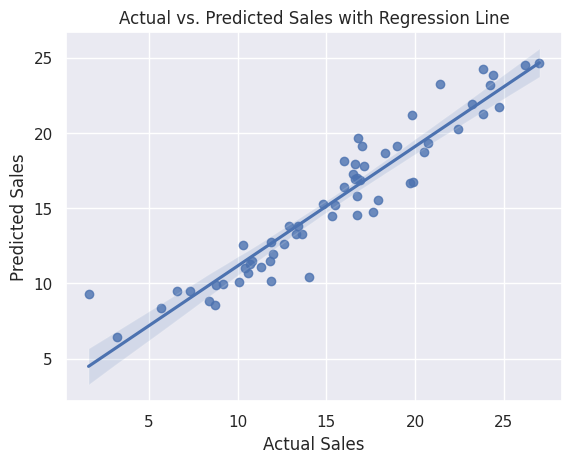

In [17]:
#Scatter plot of actual vs. predicted sales values with a regression line
sns.regplot(x=Y_test, y=predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales with Regression Line")
plt.show()


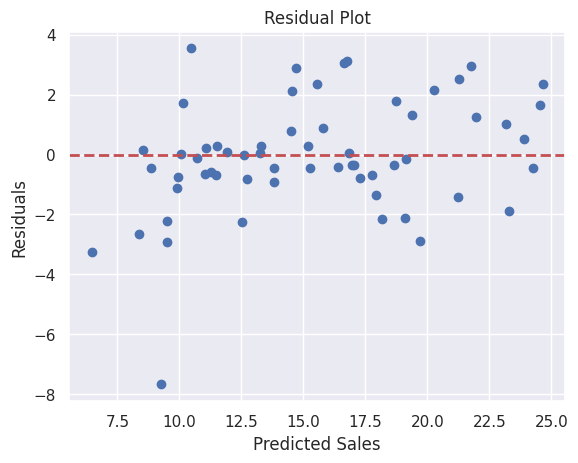

In [18]:
# Residual plot to examine the model's errors
residuals = Y_test - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


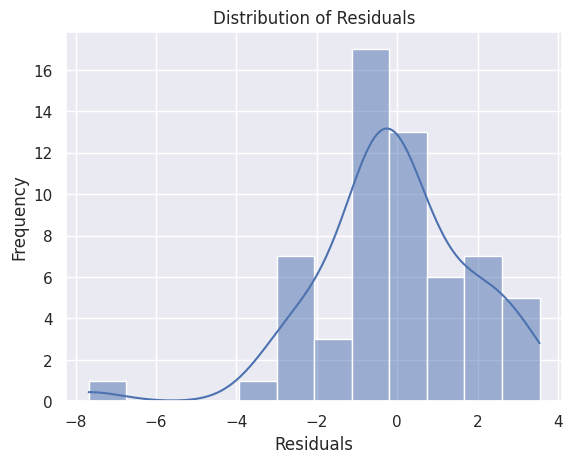

In [19]:
# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


In [20]:
# Evaluate the model using Mean Squared Error (MSE) and R-squared
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(Y_test, predictions)

# Calculate R-squared
r2 = r2_score(Y_test, predictions)

# Display evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 3.626473038410332
R-squared: 0.8877675297095177
